In [5]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path

# Do we think the same thing is happening in all of these countries?

This is a hypothetical dataset representing pesticide residues above a safety threshold vs. percentage of organic farms in different countries. How can we tell if trends are consistent across countries?

In [6]:
for file in Path('.').glob("*.csv"):
    df = pd.read_csv(file)
    x, y = df['x'], df['y']
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    coeff = np.polyfit(x, y, deg=1)
    corr = np.corrcoef(x, y)[0, 1]
    
    print(f"x_mean={x_mean:.3f}, y_mean={y_mean:.3f}, linear regression fr(x)={coeff[1]:.1f} {coeff[0]:.2f} x, r = {corr:.3f} ")

x_mean=54.261, y_mean=47.830, linear regression fr(x)=53.2 -0.10 x, r = -0.062 
x_mean=54.268, y_mean=47.836, linear regression fr(x)=53.8 -0.11 x, r = -0.069 
x_mean=54.269, y_mean=47.831, linear regression fr(x)=53.8 -0.11 x, r = -0.069 
x_mean=54.266, y_mean=47.831, linear regression fr(x)=53.8 -0.11 x, r = -0.069 
x_mean=54.267, y_mean=47.838, linear regression fr(x)=53.8 -0.11 x, r = -0.068 
x_mean=54.267, y_mean=47.840, linear regression fr(x)=53.3 -0.10 x, r = -0.063 
x_mean=54.263, y_mean=47.832, linear regression fr(x)=53.5 -0.10 x, r = -0.064 
x_mean=54.260, y_mean=47.840, linear regression fr(x)=53.6 -0.11 x, r = -0.066 
x_mean=54.260, y_mean=47.840, linear regression fr(x)=53.1 -0.10 x, r = -0.060 
x_mean=54.270, y_mean=47.837, linear regression fr(x)=53.9 -0.11 x, r = -0.069 
x_mean=54.269, y_mean=47.835, linear regression fr(x)=53.8 -0.11 x, r = -0.069 
x_mean=54.266, y_mean=47.835, linear regression fr(x)=53.4 -0.10 x, r = -0.064 
x_mean=54.267, y_mean=47.832, linear reg

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

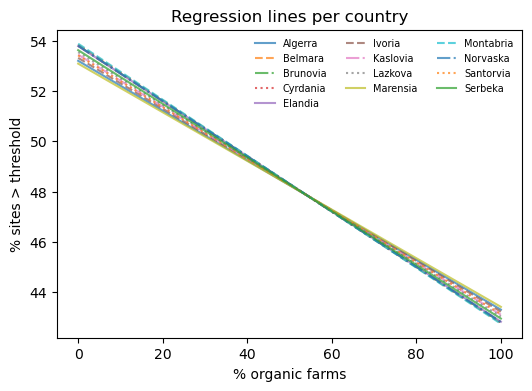

In [8]:
import itertools
plt.figure(figsize=(6,4))
x_ref = np.linspace(0, 100, 100)
for file, style in zip(Path('.').glob('*.csv'), itertools.cycle(['-','--','-.',':'])):
    df = pd.read_csv(file)
    m, b = np.polyfit(df['x'], df['y'], 1)
    plt.plot(x_ref, m*x_ref + b, style, label=file.stem, alpha=0.7)

plt.xlabel('% organic farms')
plt.ylabel('% sites > threshold')
plt.title('Regression lines per country')
plt.legend(ncol=3, fontsize=7, frameon=False)
plt.show()